In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
import datetime
import tensorflow as tf
from datetime import date, timedelta
%matplotlib inline

In [2]:
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2020, 1, 1)

In [3]:
bank="MS"
stocks = data.DataReader(bank, 'yahoo', start, end)

In [4]:
stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-12-31,55.810001,55.209999,55.259998,55.520000,2449700.0,33.187557
2005-01-03,56.529999,55.709999,55.970001,55.900002,5105800.0,33.414707
2005-01-04,56.110001,54.759998,56.000000,55.299999,6100300.0,33.056057
2005-01-05,55.919998,54.980000,55.049999,54.980000,5072100.0,32.864773
2005-01-06,56.619999,55.770000,55.950001,56.279999,5991400.0,33.641850


Text(0, 0.5, 'Opening Stock Price')

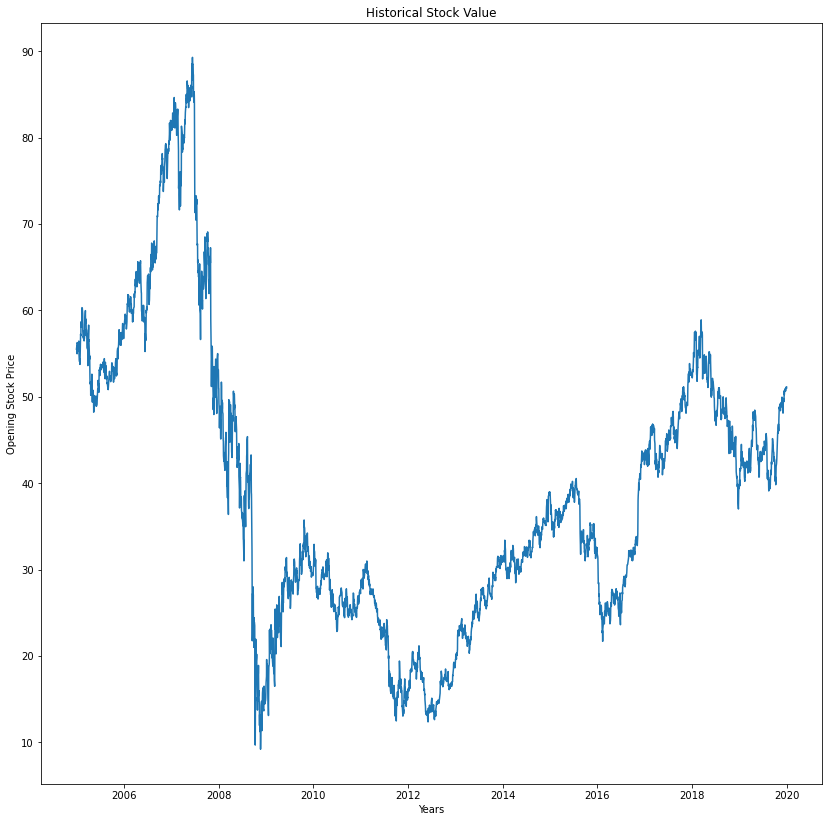

In [5]:
plt.figure(figsize=(14,14))
plt.plot(stocks['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Years')
plt.ylabel('Opening Stock Price')

In [6]:
df=stocks.reset_index()['Open']

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [8]:
train_size=int(len(df)*0.70)
test_size=len(df)-train_size
train_data=df[0:train_size]
test_data=df[train_size:]

In [9]:
def make_dataset(data,timestep):
    X=[]
    y=[]
    n=len(data)
    for i in range(0,n-timestep-1):
        X.append(data[i:i+timestep])
        y.append(data[i+timestep])
    return np.array(X),np.array(y)

In [10]:
timestep=30
X_train,y_train=make_dataset(train_data,timestep)
X_test,y_test=make_dataset(test_data,timestep)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [12]:
model=Sequential()
model.add(LSTM(40,return_sequences=True,input_shape=(timestep,1)))
model.add(LSTM(40,return_sequences=True))
model.add(LSTM(40))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam') ##Stacked LSTM

In [13]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Bidirectional
from keras.datasets import imdb 

In [14]:
modelBD = Sequential()
modelBD.add(Bidirectional(LSTM(64)))
modelBD.add(Dropout(0.5))
modelBD.add(Dense(1,activation='sigmoid'))
modelBD.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) ## Creating Bi-Directional LSTM

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 40)            6720      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 40)            12960     
_________________________________________________________________
lstm_2 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 32,681
Trainable params: 32,681
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=70,batch_size=40,verbose=1)

Epoch 1/70
66/66 [==============================] - 10s 58ms/step - loss: 0.0089 - val_loss: 9.8964e-04
Epoch 2/70
66/66 [==============================] - 2s 25ms/step - loss: 0.0011 - val_loss: 6.0569e-04
Epoch 3/70
66/66 [==============================] - 2s 25ms/step - loss: 0.0010 - val_loss: 5.6393e-04
Epoch 4/70
66/66 [==============================] - 2s 27ms/step - loss: 9.4542e-04 - val_loss: 5.5555e-04
Epoch 5/70
66/66 [==============================] - 2s 26ms/step - loss: 0.0010 - val_loss: 6.8256e-04
Epoch 6/70
66/66 [==============================] - 2s 25ms/step - loss: 8.4841e-04 - val_loss: 4.7328e-04
Epoch 7/70
66/66 [==============================] - 2s 26ms/step - loss: 7.4767e-04 - val_loss: 4.3411e-04
Epoch 8/70
66/66 [==============================] - 2s 26ms/step - loss: 8.9046e-04 - val_loss: 6.2864e-04
Epoch 9/70
66/66 [==============================] - 2s 26ms/step - loss: 7.2876e-04 - val_loss: 5.4088e-04
Epoch 10/70
66/66 [==============================] -

In [17]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [18]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
import math
from sklearn.metrics import mean_squared_error 

In [20]:
train_predict

array([[58.898945],
       [60.54155 ],
       [60.275814],
       ...,
       [39.93962 ],
       [39.620358],
       [39.033005]], dtype=float32)

In [21]:
test_predict

array([[37.733276],
       [37.755203],
       [37.825127],
       ...,
       [51.007954],
       [51.137585],
       [51.504704]], dtype=float32)

In [22]:
lookback=timestep
trainPlot=np.empty_like(df)
trainPlot[:,:]=np.nan
trainPlot[lookback:len(train_predict)+lookback, :]=train_predict

testPlot=np.empty_like(df)
testPlot[:, :]=np.nan
testPlot[len(train_predict)+(lookback*2)+1:len(df)-1, :]=test_predict

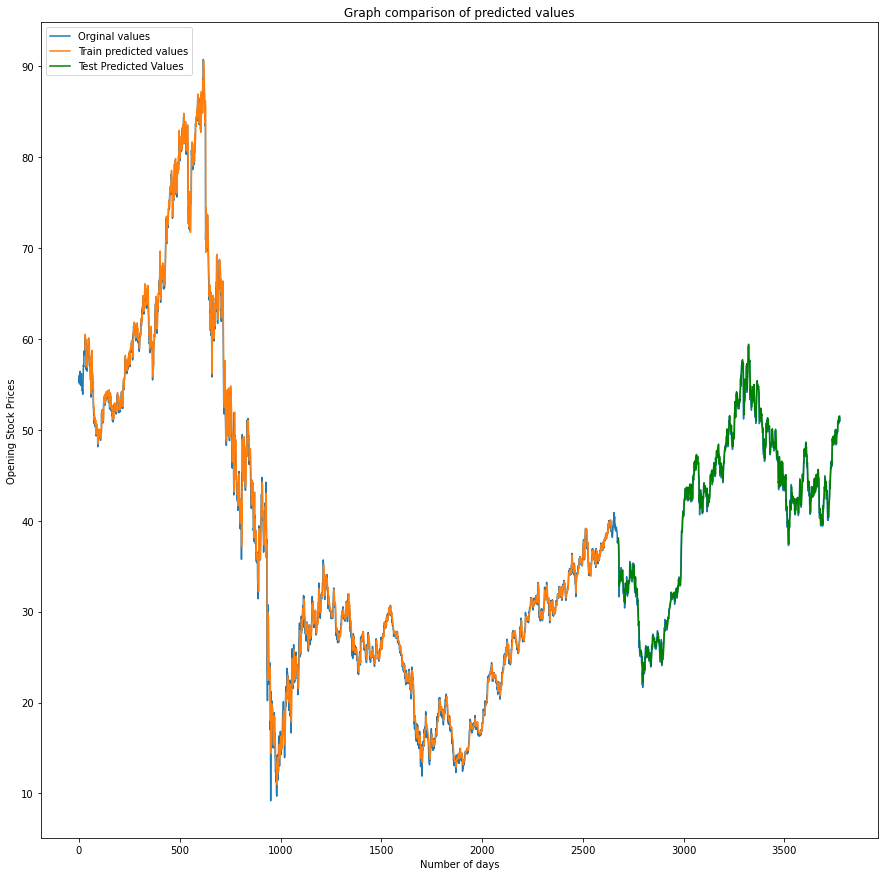

In [23]:
plt.figure(figsize=(15,15))
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPlot)
plt.plot(testPlot,color='g')
plt.title('Graph comparison of predicted values')
plt.xlabel('Number of days')
plt.ylabel('Opening Stock Prices')
plt.legend(['Orginal values','Train predicted values','Test Predicted Values'],loc=2)

In [24]:
def errorpercentage(y_test,pred):
    mape=np.mean(np.abs(y_test-pred)/y_test)*100
    return mape

In [25]:
print('Accuracy using Stacked LSTM',100-errorpercentage(scaler.inverse_transform(y_test),test_predict))

Accuracy using Stacked LSTM 98.64584373242177


In [26]:
a=test_data.shape[0]
x=test_data[a-timestep:]
scaler.inverse_transform(x)

array([[48.84000015],
       [49.22000122],
       [48.95999908],
       [49.25      ],
       [48.93999863],
       [49.34999847],
       [49.91999817],
       [49.63000107],
       [49.70000076],
       [49.58000183],
       [48.40999985],
       [48.36000061],
       [49.13999939],
       [49.84000015],
       [49.52999878],
       [49.52999878],
       [49.65999985],
       [49.65000153],
       [50.74000168],
       [50.77000046],
       [50.81999969],
       [51.        ],
       [50.65000153],
       [51.43999863],
       [50.90999985],
       [50.83000183],
       [50.97000122],
       [51.33000183],
       [51.36000061],
       [50.95999908]])

In [27]:
x.shape

(30, 1)

In [28]:
pred_stocks = data.DataReader(bank, 'yahoo', end+timedelta(1), end+timedelta(22))## reading data for next 15 days

In [29]:
pred_stocks

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,52.060001,51.169998,51.200001,52.040001,7808000,48.584858
2020-01-03,51.450001,50.830002,51.220001,51.200001,6706000,47.800629
2020-01-06,51.040001,50.459999,50.669998,51.020000,7476700,47.632587
2020-01-07,51.189999,50.709999,51.040001,50.919998,4538100,47.539219
2020-01-08,51.790001,50.900002,50.959999,51.570000,6185200,48.146069
2020-01-09,52.250000,51.820000,52.169998,52.060001,7308000,48.603535
2020-01-10,52.470001,51.919998,52.150002,52.209999,7686800,48.743568
2020-01-13,52.779999,52.070000,52.209999,52.779999,8334200,49.275730
2020-01-14,53.250000,52.680000,53.060001,52.860001,9602000,49.350418


In [30]:
actual_values=[]
for i in pred_stocks['Close']:
    actual_values.append(i)
actual_values=np.array(actual_values)

In [31]:
actual_values

array([52.04000092, 51.20000076, 51.02000046, 50.91999817, 51.56999969,
       52.06000137, 52.20999908, 52.77999878, 52.86000061, 52.93999863,
       56.43999863, 57.50999832, 55.91999817, 55.86000061, 55.52999878])

In [32]:
## Prediction for next 15 days
i=0
while(i<15):
    length_of_array=len(x)
    if(length_of_array==timestep):
        temp=x;
        temp=temp.reshape(1,timestep,1)
        yget=model.predict(temp)
        x=np.append(x,yget)
    else:
        temp=x[length_of_array-timestep:]
        temp=temp.reshape(1,timestep,1)
        yget=model.predict(temp)
        x=np.append(x,yget)
    i=i+1 

In [33]:
x=x.reshape(-1,1)
actual_values=actual_values.reshape(-1,1)
scaler.inverse_transform(x[timestep:])

array([[51.22493164],
       [51.4217724 ],
       [51.62379176],
       [51.83394131],
       [52.04268558],
       [52.24340178],
       [52.43361002],
       [52.61407858],
       [52.78785142],
       [52.95880884],
       [53.13081656],
       [53.30719086],
       [53.48999344],
       [53.68001204],
       [53.87713969]])

In [34]:
act,pred=actual_values[:i],scaler.inverse_transform(x[timestep:])

In [35]:
scaler.inverse_transform(x[timestep:])

array([[51.22493164],
       [51.4217724 ],
       [51.62379176],
       [51.83394131],
       [52.04268558],
       [52.24340178],
       [52.43361002],
       [52.61407858],
       [52.78785142],
       [52.95880884],
       [53.13081656],
       [53.30719086],
       [53.48999344],
       [53.68001204],
       [53.87713969]])

In [36]:
print('Accuracy for Future 15 days values',100-errorpercentage(act,pred))

Accuracy for Future 15 days values 97.89620035797198


In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:
print('MSE for future 15 days values',mean_absolute_error(act,pred))

MSE for future 15 days values 1.1643996061617752


In [39]:
y=len(df)-1460
Plotarr=np.empty([y+15,1])
Plotarr[::]=np.nan
Plotarr[y:]=pred

In [40]:
pred    ## stocks for the next 15 days 

array([[51.22493164],
       [51.4217724 ],
       [51.62379176],
       [51.83394131],
       [52.04268558],
       [52.24340178],
       [52.43361002],
       [52.61407858],
       [52.78785142],
       [52.95880884],
       [53.13081656],
       [53.30719086],
       [53.48999344],
       [53.68001204],
       [53.87713969]])

In [41]:
print('The above shows the predicted stock price for 15 days')

The above shows the predicted stock price for 15 days


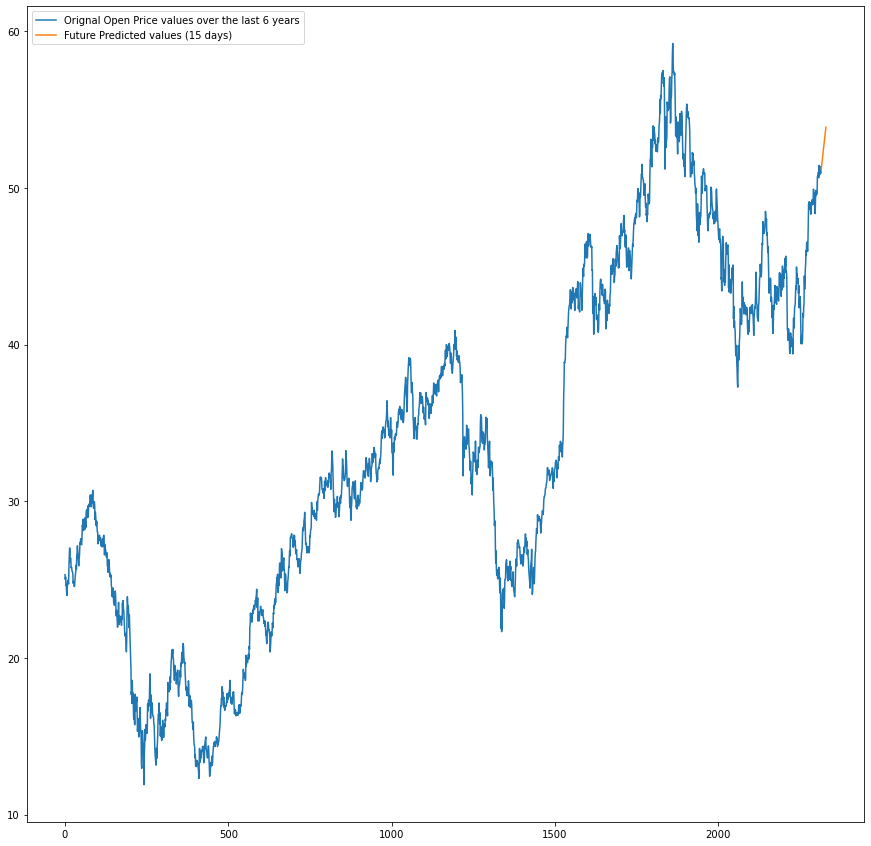

In [42]:
plt.figure(figsize=(15,15))
plt.plot(scaler.inverse_transform(df[1460:])) ## for the 
plt.plot(Plotarr)
plt.legend(['Orignal Open Price values over the last 6 years','Future Predicted values (15 days)'],loc=2)

In [43]:
f=pd.DataFrame(pred,columns=['Close'])

In [44]:
string=bank+'Data'
dfnew=pd.read_csv(string)

In [45]:
dfnew['Close']=pred

In [46]:
dfnew.to_csv(string,index=False)

In [47]:
test=pd.read_csv(string)

In [48]:
dfnew

,Close,Open
0,51.224932,51.199958
1,51.421772,51.371411
2,51.623792,51.556830
3,51.833941,51.746595
4,52.042686,51.933833
5,52.243402,52.113416
6,52.433610,52.283678
7,52.614079,52.445776
8,52.787851,52.602846
9,52.958809,52.758200


In [49]:
modelBD.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=70,batch_size=40,verbose=1)

Epoch 1/70
66/66 [==============================] - 6s 24ms/step - loss: 0.5735 - accuracy: 7.6570e-04 - val_loss: 0.6505 - val_accuracy: 0.0000e+00
Epoch 2/70
66/66 [==============================] - 1s 15ms/step - loss: 0.5295 - accuracy: 7.6570e-04 - val_loss: 0.6496 - val_accuracy: 0.0000e+00
Epoch 3/70
66/66 [==============================] - 1s 17ms/step - loss: 0.5280 - accuracy: 7.6570e-04 - val_loss: 0.6492 - val_accuracy: 0.0000e+00
Epoch 4/70
66/66 [==============================] - 1s 16ms/step - loss: 0.5269 - accuracy: 7.6570e-04 - val_loss: 0.6489 - val_accuracy: 0.0000e+00
Epoch 5/70
66/66 [==============================] - 1s 16ms/step - loss: 0.5267 - accuracy: 7.6570e-04 - val_loss: 0.6494 - val_accuracy: 0.0000e+00
Epoch 6/70
66/66 [==============================] - 1s 19ms/step - loss: 0.5269 - accuracy: 7.6570e-04 - val_loss: 0.6494 - val_accuracy: 0.0000e+00
Epoch 7/70
66/66 [==============================] - 1s 16ms/step - loss: 0.5262 - accuracy: 7.6570e-04 - v

Epoch 56/70
66/66 [==============================] - 1s 17ms/step - loss: 0.5236 - accuracy: 7.6570e-04 - val_loss: 0.6479 - val_accuracy: 0.0000e+00
Epoch 57/70
66/66 [==============================] - 1s 18ms/step - loss: 0.5236 - accuracy: 7.6570e-04 - val_loss: 0.6479 - val_accuracy: 0.0000e+00
Epoch 58/70
66/66 [==============================] - 1s 17ms/step - loss: 0.5236 - accuracy: 7.6570e-04 - val_loss: 0.6486 - val_accuracy: 0.0000e+00
Epoch 59/70
66/66 [==============================] - 1s 16ms/step - loss: 0.5237 - accuracy: 7.6570e-04 - val_loss: 0.6484 - val_accuracy: 0.0000e+00
Epoch 60/70
66/66 [==============================] - 1s 17ms/step - loss: 0.5234 - accuracy: 7.6570e-04 - val_loss: 0.6480 - val_accuracy: 0.0000e+00
Epoch 61/70
66/66 [==============================] - 1s 16ms/step - loss: 0.5234 - accuracy: 7.6570e-04 - val_loss: 0.6482 - val_accuracy: 0.0000e+00
Epoch 62/70
66/66 [==============================] - 1s 16ms/step - loss: 0.5236 - accuracy: 7.6570e

In [50]:
train_predict=modelBD.predict(X_train)
test_predict=modelBD.predict(X_test)

In [51]:
trypredict=scaler.inverse_transform(test_predict)

In [52]:
trypredict

array([[38.10624 ],
       [37.906925],
       [37.767998],
       ...,
       [50.25115 ],
       [50.23376 ],
       [50.283085]], dtype=float32)

In [53]:
print('Accuracy using Bi-directional LSTM',100-errorpercentage(scaler.inverse_transform(y_test),trypredict))

Accuracy using Bi-directional LSTM 97.77434553595354
